In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

video_data = pd.read_csv('../data/USvideos.csv')
#trending_date,views,likes,dislikes, categories = video_data['trending_date'],video_data['views'],video_data['likes'],video_data['dislikes'],video_data['category_id']
#title = video_data['title']
ss = StandardScaler()
le = LabelEncoder()
enc = OneHotEncoder(sparse=False)
# preprocessed_data = {}
# preprocessed_data['key'] = video_data['video_id']
# preprocessed_data['trending_date'] = (le.fit_transform(trending_date))
# preprocessed_data['views'] = (ss.fit_transform(np.array(views).reshape(-1,1)))
# preprocessed_data['likes'] = (ss.fit_transform(np.array(likes).reshape(-1,1)))
# preprocessed_data['dislikes'] = (ss.fit_transform(np.array(dislikes).reshape(-1,1)))
# preprocessed_data['title'] = (video_data['title'])
# preprocessed_data['comments_disabled'] = (le.fit_transform(video_data['comments_disabled']))
# print(preprocessed_data['views'])
scaler_columns = ['likes', 'likes to views','dislikes', 'dislikes to views','comment_count', 'comment_count to views']
scaled_to_views = ['likes', 'dislikes','comment_count']
for x in scaled_to_views:
    video_data[x + ' to views'] = video_data[x] / video_data['views']
OHE_categories = ['comments_disabled' , 'category_id','ratings_disabled']
df_processed = pd.DataFrame(ss.fit_transform(video_data[scaler_columns]),columns = scaler_columns,index = None)
OHE_categories = pd.DataFrame(enc.fit_transform(video_data[OHE_categories]),columns = enc.get_feature_names(),index = None)
semi_processed = pd.concat([df_processed,OHE_categories],axis = 1)
full_processed = pd.concat([video_data['views'],semi_processed],axis = 1)

print(full_processed.head())
#export_csv = full_processed.to_csv (r'../data/Processed_Data.csv', index = None, header = True)



     views     likes  likes to views  dislikes  dislikes to views  \
0   748374 -0.073137        1.571973 -0.025677           0.625042   
1  2418783  0.100131        0.213502  0.083867           0.246598   
2  3191434  0.313551        0.420049  0.056067           0.015635   
3   343168 -0.280033       -0.176669 -0.104908           0.086897   
4  2095731  0.253267        1.062056 -0.059333          -0.176963   

   comment_count  comment_count to views  x0_0.0  x0_1.0  x1_1.0  ...  \
0       0.200566                2.940016     1.0     0.0     0.0  ...   
1       0.113711                0.139240     1.0     0.0     0.0  ...   
2      -0.007101               -0.329413     1.0     0.0     0.0  ...   
3      -0.168336                0.313859     1.0     0.0     0.0  ...   
4       0.242351                0.680883     1.0     0.0     0.0  ...   

   x1_23.0  x1_24.0  x1_25.0  x1_26.0  x1_27.0  x1_28.0  x1_29.0  x1_43.0  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0     

In [ ]:
#Things to look at: 
#print(video_data['video_id'][2],views[2])
# list_tags = {}
# for x in video_data['tags']:
#     split_tags = x.split('|')
#     for y in split_tags:
#         list_tags[y] = []
#print(list_tags)
import pandas as pd
import numpy as np
video_data = pd.read_csv('../data/USvideos.csv')

list_tags = []
for x in video_data['tags']:
    list_tags.append(x.split('|'))
flatlist = []
for sublist in list_tags:
    for item in sublist:
        flatlist.append(item)

unique_list = np.unique(np.array(flatlist))
print(len(flatlist),len(unique_list))
a = np.zeros(shape=(len(video_data),len(unique_list)),dtype = int)
tag_dataframe = pd.DataFrame(a,columns=unique_list)
print(tag_dataframe.head())
for sublist in list_tags:
    counter=0
    for item in sublist:
        tag_dataframe[item][counter] = 1
    counter+=1

# # print(list_tags['trump'])

# The first for loop (for x in video_data['tags']) is definitely necessary. 
# If you'd like to speed up your code, you should work with numpy arrays. They are orders of magnitude faster to operate than python lists. 
# For example, once you have your split_tags list of lists, you could collect the unique elements by using np.unique. 
# Then you could create an array which will contain the one hot encoded version of the tags. 
# The array will have the dimensions [number of videos, number of unique tags]. Then you need another loop to fill up this array with ones at the appropriate locations.

 

# I hope this helps!

# Andras

808183 58123
    Acceptance Speech    Alex Pardee Inspired Bodypaint Tutorial  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

    Anwar Jibawi & Alphacat"   Anwar Jibawi & Ric Flair"   Anwar Jibawi"  \
0                          0                           0               0   
1                          0                           0               0   
2                          0                           0               0   
3                          0                           0               0   
4                          0                           0               0   

    Artist"   Best Friend Makeover Challenge with boyinaband  \
0         0                                              

In [2]:
# #I can use f test and pca at least, and I can do one other plot without too much work. Check out lecture 9 and 10. 

import pandas as pd
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/Processed_Data.csv')
y = df['views'].values # the target variable
df.drop(columns=['views'],inplace=True)
#df.drop(columns=['key'],inplace=True)

X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)

print(feature_names[np.argsort(p_values)[:3]]) # small p value means more important features
print(feature_names[np.argsort(f_test)[:-4:-1]]) # large f score means more important features
#This overwhelming one sidedness of the results is what prompted me to change my approach with how to decide important factors. The idea now was to use, instead of likes dislike and comment count, to use
#the ratio of these things. 
#Now I repeat the above but having removed likes dislikes and comment count and replace it with the ratio of that to views. 

Index(['likes', 'x1_10.0', 'dislikes'], dtype='object')
Index(['likes', 'comment_count', 'dislikes'], dtype='object')


In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv('../data/Processed_Data.csv')
df.drop(columns = ['views'],inplace=True)
df.drop(columns=['likes'],inplace=True)
df.drop(columns=['dislikes'],inplace=True)
df.drop(columns=['comment_count'],inplace=True)
df.drop(columns=['comment_count to views'],inplace=True)

X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)

print(feature_names[np.argsort(p_values)]) # small p value means more important features
print(feature_names[np.argsort(f_test)]) # large f score means more important features
#After doing that we find that the main influencers are categories and not just pure number of likes dislikes and comment count. 
category_list = feature_names[np.argsort(p_values)[:5]]


Index(['x1_10.0', 'x1_26.0', 'x1_25.0', 'x1_27.0', 'x1_23.0', 'likes to views',
       'x1_22.0', 'x1_15.0', 'x1_28.0', 'x1_1.0', 'x1_24.0', 'x1_19.0',
       'x2_0.0', 'x2_1.0', 'x1_2.0', 'x1_17.0', 'x1_43.0', 'x1_20.0',
       'dislikes to views', 'x1_29.0', 'x0_1.0', 'x0_0.0'],
      dtype='object')
Index(['x0_0.0', 'x0_1.0', 'x1_29.0', 'dislikes to views', 'x1_20.0',
       'x1_43.0', 'x1_17.0', 'x1_2.0', 'x2_1.0', 'x2_0.0', 'x1_19.0',
       'x1_24.0', 'x1_1.0', 'x1_28.0', 'x1_15.0', 'x1_22.0', 'likes to views',
       'x1_23.0', 'x1_27.0', 'x1_25.0', 'x1_26.0', 'x1_10.0'],
      dtype='object')


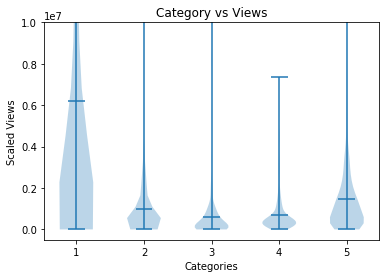

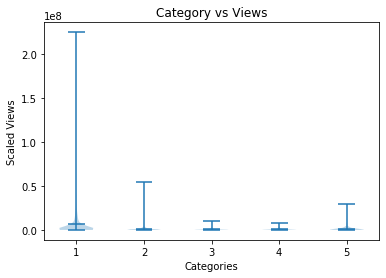

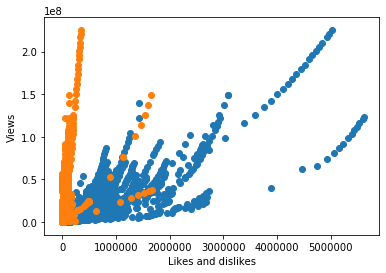

In [29]:
#We can see how some of the categories are influential, lets look at the top 5 categories and create violin graphs from them. 
import matplotlib.pyplot as plt
df = pd.read_csv('../data/Processed_Data.csv')
df.drop(columns=['likes'],inplace=True)
df.drop(columns=['dislikes'],inplace=True)
df.drop(columns=['comment_count'],inplace=True)
df.drop(columns=['comment_count to views'],inplace=True)

X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)

list_data = []
for x in category_list:
    data=np.array(df[(df[x] == 1)]['views'])
    list_data.append(data)
plt.ylim((-500000, 10000000))   # set the ylim to bottom, top

plt.violinplot(list_data, range(1,6),showmeans=True,)
plt.title('Category vs Views')
plt.ylabel('Scaled Views')
plt.xlabel('Categories')
plt.savefig('../figures/violinplotzoom.png',dpi=300)
plt.show()


plt.violinplot(list_data, range(1,6),showmeans=True,)
plt.title('Category vs Views')
plt.ylabel('Scaled Views')
plt.xlabel('Categories')
plt.savefig('../figures/violinplot.png',dpi=300)
plt.show()



plt.scatter(video_data['likes'],video_data['views'])
plt.scatter(video_data['dislikes'],video_data['views'])

plt.ylabel('Views')
plt.xlabel('Likes and dislikes')
plt.savefig('../figures/scatter.png',dpi=300)

plt.show()


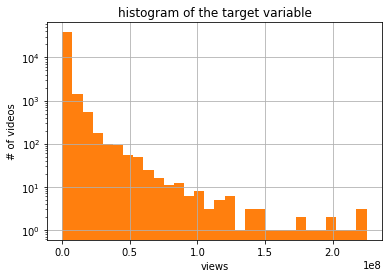

In [30]:
#As we can see from the scatter plot, videos with low dislikes do well and videos with high likes do well. We can also see that some videos with high dislikes can also do well. 

df = pd.read_csv('../data/Processed_Data.csv')
y = df['views']
y.hist(bins=30)
plt.hist(y,bins=30,log=True)
plt.xlabel('views')
plt.ylabel('# of videos')
plt.title('histogram of the target variable')
plt.savefig('../figures/histogram.png',dpi=300)

plt.show()
#print(y.describe())
# dz = pd.read_csv('USvideos.csv')
# y = dz['views']
# y.hist(bins=30)
# plt.hist(y,bins=30,log=True,)
# plt.xlabel('views')
# plt.ylabel('# of videos')
# plt.title('histogram of the target variable')
# plt.show()
#print(y.describe())

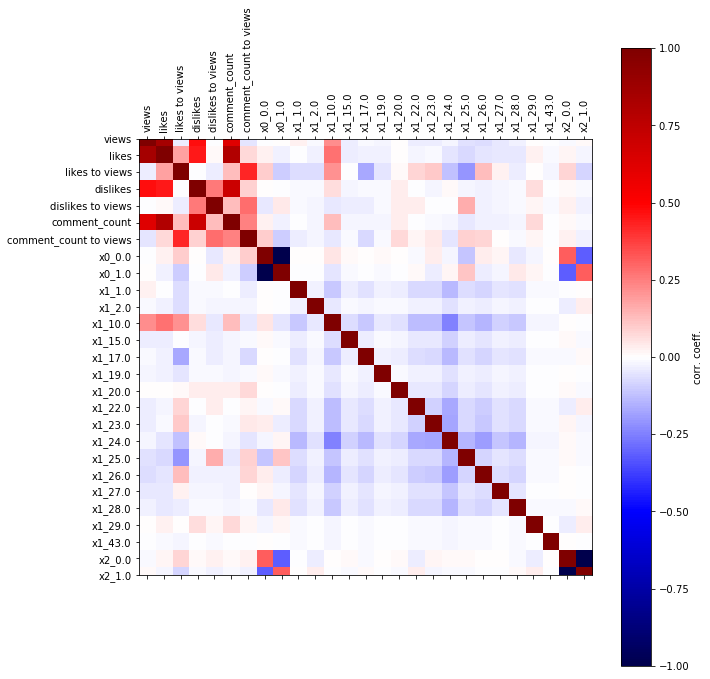

In [31]:
df = pd.read_csv('../data/Processed_Data.csv')

plt.figure(figsize=(10,10))
plt.matshow(df.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df.corr().shape[0]),list(df.corr().columns),rotation=90)
plt.yticks(np.arange(df.corr().shape[0]),list(df.corr().columns))
plt.tight_layout()
plt.savefig('../figures/scattermatrix.png',dpi=300)

plt.show()


In [36]:
from sklearn.decomposition import PCA

df = pd.read_csv('../data/Processed_Data.csv')
y = df['views']
df.drop(columns=['views'],inplace=True)
pca = PCA(n_components=df.shape[1]) 
X_pca = pca.fit_transform(df)
print(np.cumsum(pca.explained_variance_ratio_))
print(sum(np.cumsum(pca.explained_variance_ratio_) < 0.95)+1)

[0.35615378 0.55483641 0.71736331 0.78960115 0.85771618 0.8867795
 0.90578831 0.91994875 0.93352465 0.94519545 0.95451873 0.96288219
 0.97100517 0.97867242 0.98474182 0.98909655 0.99264277 0.99561968
 0.99717986 0.99856344 0.99957251 0.99979999 1.         1.
 1.         1.        ]
11
